In [ ]:
%load_ext autoreload
%autoreload 2

#그리기 함수 읽어들이기
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/draw3d.py" -O "draw3d.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/draw2d.py" -O "draw2d.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/colors.py" -O "colors.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/vector_drawing.py" -O "vector_drawing.py"
    !wget "https://raw.githubusercontent.com/lusina0304/Algorithm2024_fall/refs/heads/main/2025_spring/vectors.py" -O "vectors.py"

# 3차원 그리기

## 파이썬코드

In [2]:
from draw3d import *

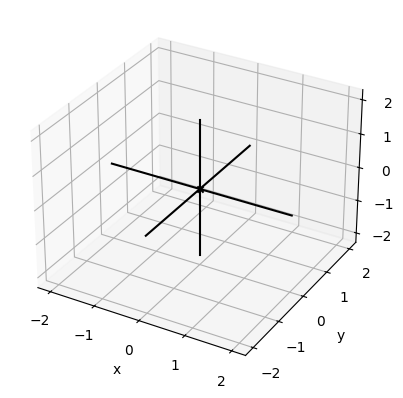

In [3]:
draw3d()

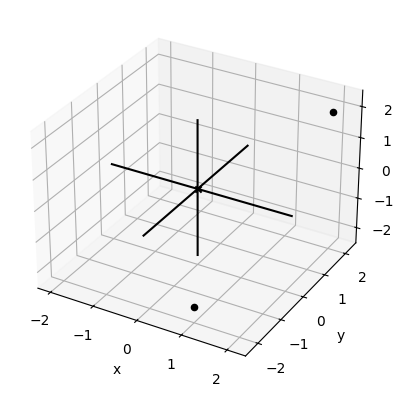

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

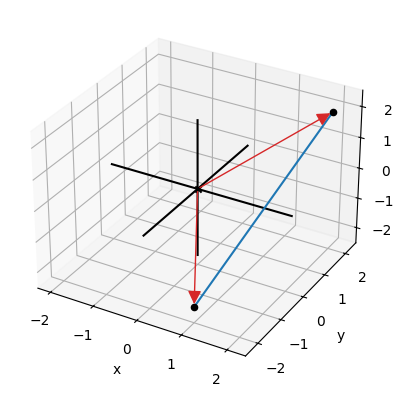

In [3]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2))
)

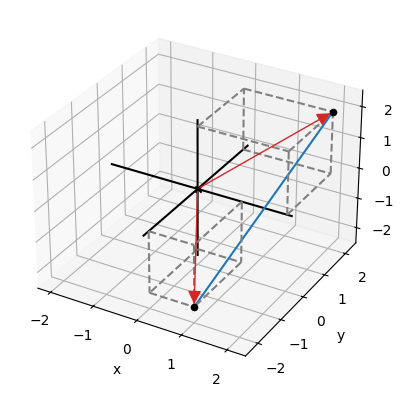

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

3D 좌표 $(-1,-2,2)$ 에 해당하는 위치에 점과 화살표를 그려보자.

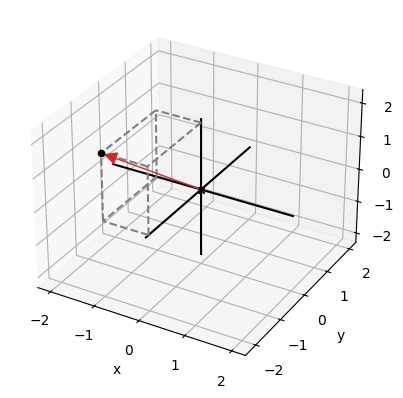

In [5]:
v = (-1,-2,2)
draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

# 3D 벡터의 산술

## 3D 벡터의 덧셈

In [6]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [7]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [8]:
for item in zip([1, 2, 3], ['sugar', 'spice', 'everything nice']):
    print(item)

(1, 'sugar')
(2, 'spice')
(3, 'everything nice')


In [9]:
[sum(coords) for coords in [(1, 2, 4), (1, 4, 2), (3, -4, -2)]]

[7, 7, -3]

In [16]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [10]:
add((1,1,3),(2,4,-4),(4,2,-2))

(7, 7, -3)

**Exercise:** 두개의 벡터 `vectors1=[(1,2,3,4,5), (6,7,8,9,10)]` 와 `vectors2=[(1,2), (3,4), (5,6)]`가 있을 때 `len(zip(*vectors1))` 과 `len(zip(*vectors2))`의 각 결과는 어떤가?

In [ ]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]

In [ ]:
vectors2=[(1,2), (3,4), (5,6)]

In [ ]:
len(list(zip(*vectors1)))

In [ ]:
len(list(zip(*vectors2)))

## 벡터의 길이 구하기

In [11]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [12]:
length((3,4,12))

13.0

**Mini project:** 아래 표현은 24개의 3차원 벡터를 만든다.
```
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
```
이 들을 모두 합한 모양은 어떻게 될까? 합치는 각각 과정을 그림으로 그려라.

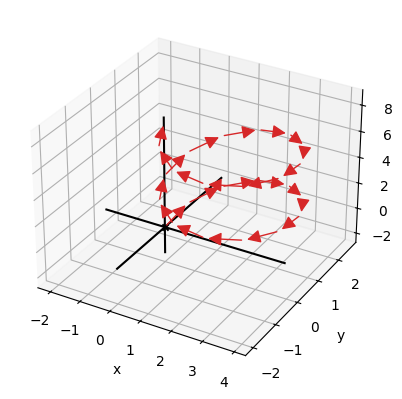

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


In [50]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0) #<1>
arrows = []
for v in vs:
    next_sum = add(running_sum, v) #2
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum
draw3d(*arrows)
print(running_sum)

**Exercise:** 스칼라 곱을 수행하는 함수 `scale(scalar,vector)` 를 작성하시오. 특히 벡터의 차원의 수와 무관하게 동작하여야 한다. (2차원, 3차원 모두 활용 가능해야 한다.)

In [ ]:
def scale(scalar,v):
    return ?

**Exercise:** 벡터 $(-1,-1,2)$ 와 방향은 같지만 길이가 1인 벡터를 구하시오. Hint: 해당 벡터에 적절한 값을 곱해주면 된다.(scale 함수 사용) 적절한 값은 무엇일까?

In [ ]:
v = (-1, -1, 2)

?

# The dot product(내적): 벡터들의 일치 정도를 측정한다.

## 내적 계산

In [19]:
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

## 내적 계산 예시

In [ ]:
dot((1,0),(0,2))

0

In [ ]:
dot((0,3,0),(0,0,-5))

0

In [ ]:
dot((3,4),(2,3))

18

In [ ]:
dot(scale(2,(3,4)),(2,3))

36

In [ ]:
dot((3,4),scale(2,(2,3)))

36

In [ ]:
dot((4,3),(8,6))

50

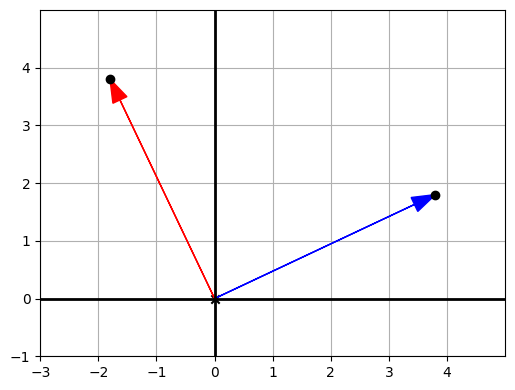

0.0

In [28]:
from vector_drawing import *

u = (-1.8, 3.8)
v = (3.8, 1.8)

draw(
    Arrow(u, color='red'),
    Points(u),
    Arrow(v, color='blue'),
    Points(v)
)

dot(u, v)

## 내적을 활용한 각도 측정

In [34]:
from math import cos,pi, acos

In [ ]:
3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [31]:
def angle_between(v1,v2):
    return acos(
                dot(v1,v2) /
                (length(v1) * length(v2))
            )

In [ ]:
u = (3, 4)
v = (4, 3)

dot(u, v)

24

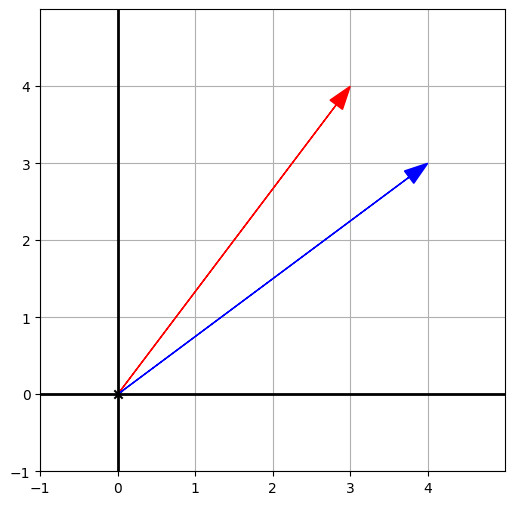

In [40]:
draw(
    Arrow(u, color='red'),
    Arrow(v, color='blue')
)

In [44]:
acos(dot(u, v) / (length(u) * length(v)))


0.283794109208328

**Exercise:** $\vec{u}$ 와 $\vec{v}$ 는 각 길이가 $|\vec{u}| = 3.61$ 이고 $|\vec{v}| = 1.44$인 벡터라고 하자. $\vec{u}$ 와 $\vec{v}$ 사이각은 101.3 도(degree) 이다. 두 벡터의 내적은 얼마인가?

In [ ]:
?

**Mini Project:** 벡터 $(3,4)$ 와 $(4,3)$ 의 사이각을 구하여라. 첫 번째는 2차원 극 좌표계 변환을 이용해 구하고, 두 번째로는 내적을 이용해 구하라.

In [ ]:
from vectors import to_polar
v1 = (4, 3)
v2 = (3, 4)
# 극 좌표계를 활용
?

In [ ]:
# 내적을 활용
?